In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [14]:
def load_em_data(filepath):
    """
    Load dataset for the EM algorithm.
    
    Parameters:
        filepath (str): Path to the dataset file.
        
    Returns:
        np.ndarray: 1D array of number of children in families.
    """
    return np.loadtxt(filepath)

# Load the dataset
em_data = load_em_data("em_data.txt")
# em_data = load_em_data("em_data_online.txt")
print(f"Data loaded. Shape: {em_data.shape}")

Data loaded. Shape: (1000,)


In [15]:
def initialize_parameters():
    """
    Initialize parameters for the EM algorithm.
    
    Returns:
        tuple: Initial mean and proportion estimates.
    """
    # Initial guesses for means and proportions
    mean_with_planning = 2.0
    mean_without_planning = 5.0
    proportion_with_planning = 0.5
    proportion_without_planning = 0.5
    
    return mean_with_planning, mean_without_planning, proportion_with_planning, proportion_without_planning

# Initialize parameters
mu1, mu2, pi1, pi2 = initialize_parameters()

In [16]:
from scipy.special import factorial  # Import vectorized factorial function

def em_algorithm(data, tol=1e-6, max_iter=100):
    """
    Perform the Expectation-Maximization (EM) algorithm for Poisson mixture model.
    
    Parameters:
        data (np.ndarray): 1D array of data points.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.
        
    Returns:
        tuple: Estimated parameters (mean_with_planning, mean_without_planning,
               proportion_with_planning, proportion_without_planning).
    """
    # Initialize parameters
    mu1, mu2, pi1, pi2 = initialize_parameters()
    
    n = len(data)
    log_likelihoods = []
    
    for iteration in range(max_iter):
        # E-step: Compute responsibilities
        r1 = pi1 * np.exp(-mu1) * (mu1**data) / factorial(data)
        r2 = pi2 * np.exp(-mu2) * (mu2**data) / factorial(data)
        total_responsibility = r1 + r2
        
        r1 /= total_responsibility
        r2 /= total_responsibility
        
        # M-step: Update parameters
        pi1 = np.mean(r1)
        pi2 = 1 - pi1
        
        mu1 = np.sum(r1 * data) / np.sum(r1)
        mu2 = np.sum(r2 * data) / np.sum(r2)
        
        # Compute log-likelihood
        log_likelihood = np.sum(np.log(total_responsibility))
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print(f"Converged after {iteration} iterations.")
            break
            
    return mu1, mu2, pi1, pi2, log_likelihoods

# Run EM algorithm
mean_with, mean_without, prop_with, prop_without, log_likelihoods = em_algorithm(em_data)


In [17]:
def print_em_results(mean_with, mean_without, prop_with, prop_without):
    """
    Print the results of the EM algorithm.
    
    Parameters:
        mean_with (float): Mean number of children in families with family planning.
        mean_without (float): Mean number of children in families without family planning.
        prop_with (float): Proportion of families with family planning.
        prop_without (float): Proportion of families without family planning.
    """
    print(f"Mean number of children (with family planning): {mean_with:.2f}")
    print(f"Mean number of children (without family planning): {mean_without:.2f}")
    print(f"Proportion of families (with family planning): {prop_with:.2f}")
    print(f"Proportion of families (without family planning): {prop_without:.2f}")

# Print results
print_em_results(mean_with, mean_without, prop_with, prop_without)


Mean number of children (with family planning): 1.78
Mean number of children (without family planning): 4.91
Proportion of families (with family planning): 0.36
Proportion of families (without family planning): 0.64


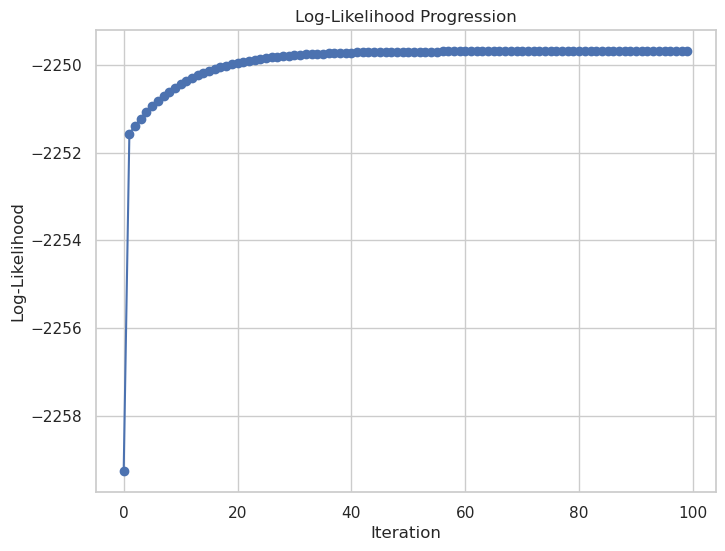

In [18]:
def plot_log_likelihood(log_likelihoods):
    """
    Plot the log-likelihood progression over iterations.
    
    Parameters:
        log_likelihoods (list): Log-likelihood values at each iteration.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(log_likelihoods, marker='o')
    plt.title("Log-Likelihood Progression")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.grid(True)
    plt.show()

# Plot log-likelihood
plot_log_likelihood(log_likelihoods)